# Imports 

In [ ]:
import json; import os; import pandas as pd; import spacy; 
from spacy.matcher import PhraseMatcher
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

 # Functions
 Vader Setiment\
 Spacy 

In [ ]:
sentimentSet = []
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    sentimentSet.append(sentiment_dict)
    
nlp = spacy.load("en_core_web_sm")

# Jason file manipulation



In [ ]:
# Counting jason files in directory 
folders = os.listdir("edhrec Slack export Sep 4 2016 - Oct 23 2019"); folderSize = (len(folders)); folderNames = [0]*folderSize
ii = 0

### Ignoring json files in folder (channels.json, integration_ logs.json, users.json)
for count in range(len(folderNames)):

    folderNames[ii] = folders[ii]   
    ii += 1

    if folderNames[ii-1] == "channels.json":
        folderNames[ii-1] = 0

    
    if folderNames[ii-1] == "integration_logs.json":
        folderNames[ii-1] = 0
    
    if folderNames[ii-1] == "users.json":
        folderNames[ii-1] = 0
###

### Removing placed zeros             
try:
    while True:
        folderNames.remove(0)
except ValueError:
    pass 
###



# Jason files to Python dictionaries

In [ ]:
fileList = []; folderList = []; folderPath = [0]*len(folderNames); mainPath = []; slackContent = []; all_possible_keys = set()

jj = 0; ii = 0

### Conversion of json files to python dictionaries and collection of key value pairs
for Paths in folderNames:
    
    mainPath1 = 'C:/Users/solid/Documents/Scripts/Code/'
    mainPath2 = 'MindStand/edhrec Slack export Sep 4 2016 - Oct 23 2019/'
    folderPath[ii] = folderNames[ii]
    folderList.append(os.path.join(mainPath1,mainPath2,folderPath[ii]))
    fileIter = os.listdir(folderList[ii])
    
    for d in range(len(fileIter)):
        fileList.append(fileIter[d])  
        mainPath.append(os.path.join(folderList[ii],fileList[d]))
        mainPath[jj] = mainPath[d].replace('\\','/')
        with open(mainPath[ii], encoding="utf8") as f:
            data = json.load(f)
            slackContent.append(data)
            for d in data:

                for k in d.keys():
                    all_possible_keys.add(k)

        jj += 1
    ii += 1
###

# Dataframe Creation

In [ ]:
### Creation of dataframe based on a key: [list of values] organization
main_data = {}
for stuff in slackContent:
    for p in stuff:
        for field in list(all_possible_keys):
            if field not in main_data:
                main_data[field] = []
            if field in p:
                main_data[field].append(p[field])
            else:
                main_data[field].append(None)
dataframe = pd.DataFrame.from_dict(main_data)
df = dataframe[['text','thread_ts','user']]
###

# Spacy application

In [ ]:
### Iterating through dataframe and applying spacy
dataStart = 2000
dataEnd =  2100
dataSpan = range(0,len(df),1)
test_nlp = [0]*len(dataSpan)
ii = 0
for row in dataSpan:
    test_nlp[ii] = nlp(df.text[row])
    ii += 1 
###

# Creation of Noun, Verb, and Adjective sets

In [ ]:
wordDataList = []
# DataFrames = pd.DataFrame()
ii = 0
for row in test_nlp:
    sentence = [row.text]
    noun = [token.text for token in test_nlp[ii] if token.pos_ == "NOUN"]
    Verb = [token.text for token in test_nlp[ii] if token.pos_ == "VERB"]
    Adj = [token.text for token in test_nlp[ii] if token.pos_ == "ADJ"]
    pt1 = sentence
    pt2 = noun
    pt1_pt2 = sentence,noun
    wordDataList.append([pt1_pt2])
    iterDataFrame = pd.DataFrame(wordDataList[0], columns=['Sentence','Nouns'])
    # wordDataFrame = DataFrames.append(iterDataFrame)
    wordDataFrame = pd.DataFrame().append(iterDataFrame)
    
    ii+=1
# wordDataFrame = pd.DataFrame(wordDataList[-1],columns=['sentence','Noun'])
# wordDataFrame = pd.DataFrame({'sentence':pt1,'Noun':pt2})




In [ ]:
wordDataList = []
iterDataFrame = [0]*len(test_nlp)
# DataFrames = pd.DataFrame()
ii = 0
for row in test_nlp:
    Sentence = [row.text]
    Noun = [token.text for token in test_nlp[ii] if token.pos_ == "NOUN"]
    Verb = [token.text for token in test_nlp[ii] if token.pos_ == "VERB"]
    Adj = [token.text for token in test_nlp[ii] if token.pos_ == "ADJ"]
    pt1 = sentence
    pt2 = Noun
    pt3 = Verb
    pt4 = Adj
    pts = Sentence,Noun,Verb,Adj
    wordDataList.append(pts)
    ii+=1

wordDataFrame = pd.DataFrame(wordDataList,columns=['Sentence','Noun','Verb','Adjective'])
wordDataFrame


<AxesSubplot:xlabel='Noun'>

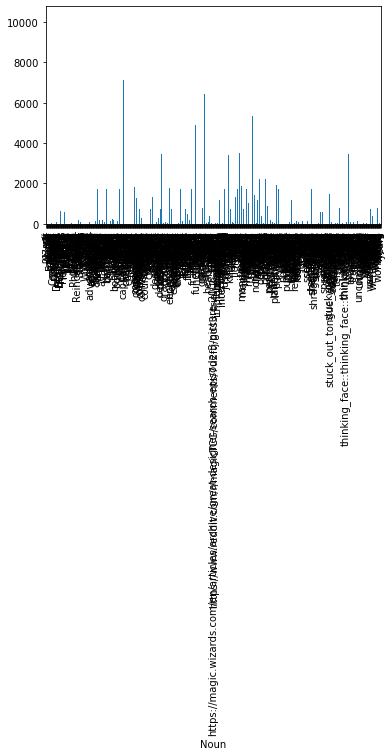

In [47]:
# type(wordDataFrame)
# wordDataFrame.Adjective.explode().unique()
wordDataFrame.explode('Noun').groupby('Noun').size().plot(kind='bar')

<AxesSubplot:xlabel='Verb'>

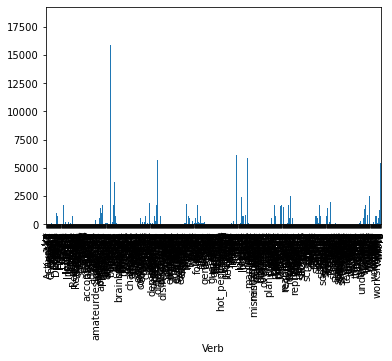

In [48]:
wordDataFrame.explode('Verb').groupby('Verb').size().plot(kind='bar')

<AxesSubplot:xlabel='Adjective'>

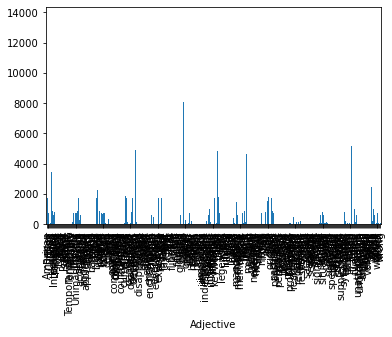

In [49]:
wordDataFrame.explode('Adjective').groupby('Adjective').size().plot(kind='bar')